2025-04-24 10:39:12.281702: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745491152.507506      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745491152.574284      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 350 images belonging to 2 classes.
Found 87 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-24 10:39:28.185473: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/15 ━━━━━━━━━━━━━━━━━━━━ 3s 758ms/step - accuracy: 0.5460 - loss: 1.0661

/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


15/15 ━━━━━━━━━━━━━━━━━━━━ 27s 873ms/step - accuracy: 0.5467 - loss: 1.0405 - val_accuracy: 0.5172 - val_loss: 0.6977
Epoch 2/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 21s 802ms/step - accuracy: 0.6474 - loss: 0.6340 - val_accuracy: 0.5862 - val_loss: 0.6693
Epoch 3/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 801ms/step - accuracy: 0.7298 - loss: 0.5236 - val_accuracy: 0.6437 - val_loss: 0.7760
Epoch 4/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 41s 713ms/step - accuracy: 0.8158 - loss: 0.4267 - val_accuracy: 0.5862 - val_loss: 0.6621
Epoch 5/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 21s 869ms/step - accuracy: 0.8672 - loss: 0.3447 - val_accuracy: 0.6667 - val_loss: 0.8760
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


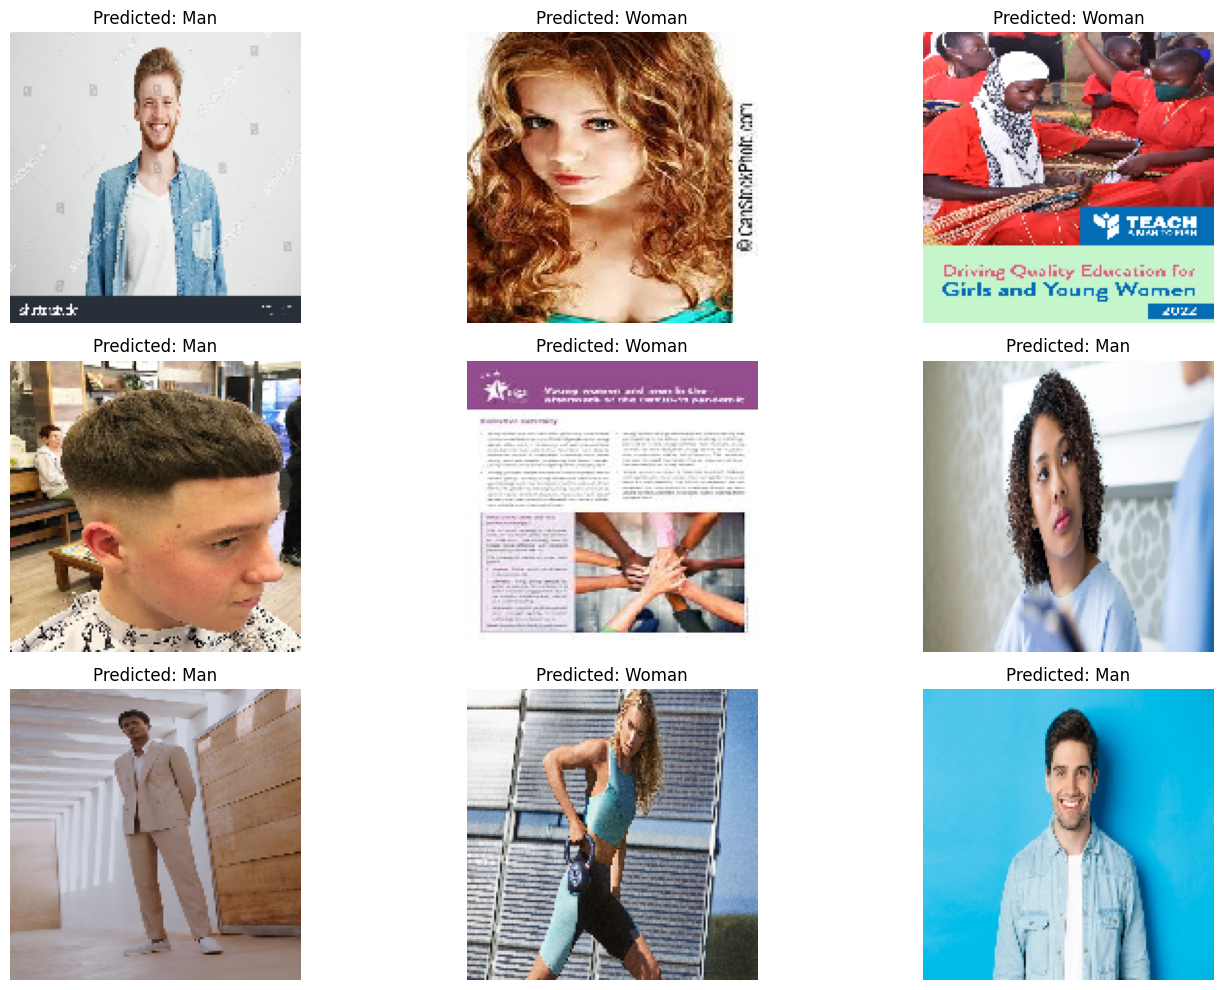

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 812ms/step

Classification Report:

              precision    recall  f1-score   support

         Men       0.69      0.58      0.63        43
       Women       0.65      0.75      0.69        44

    accuracy                           0.67        87
   macro avg       0.67      0.67      0.66        87
weighted avg       0.67      0.67      0.66        87



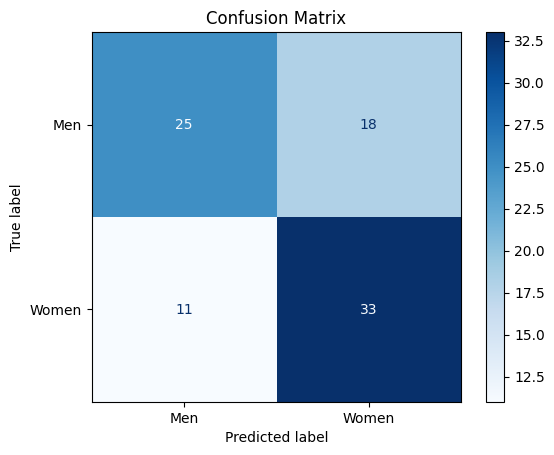

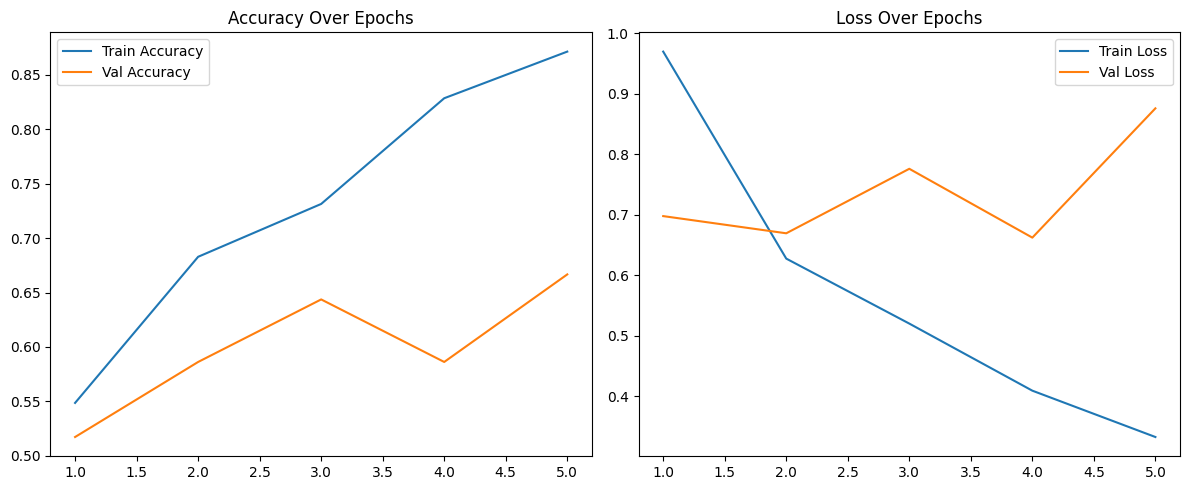

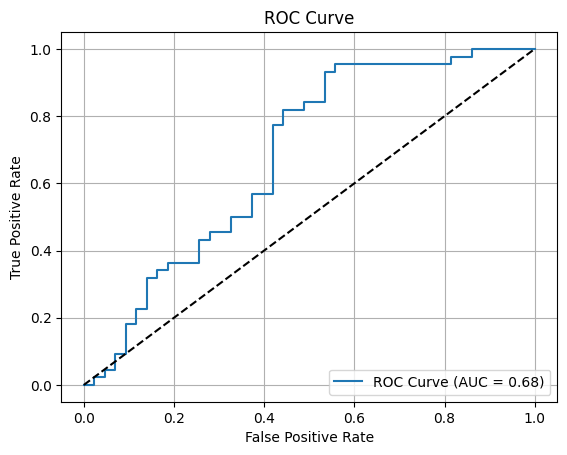

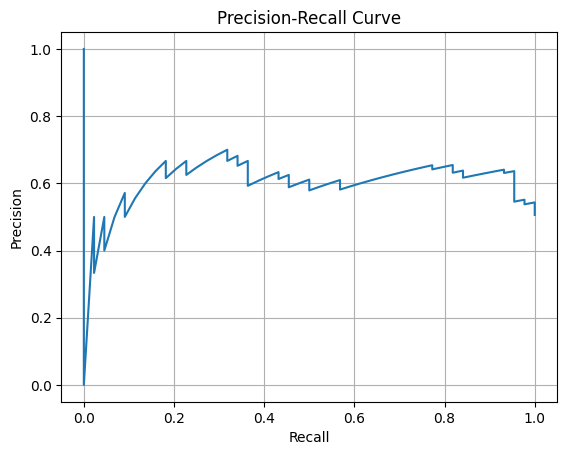

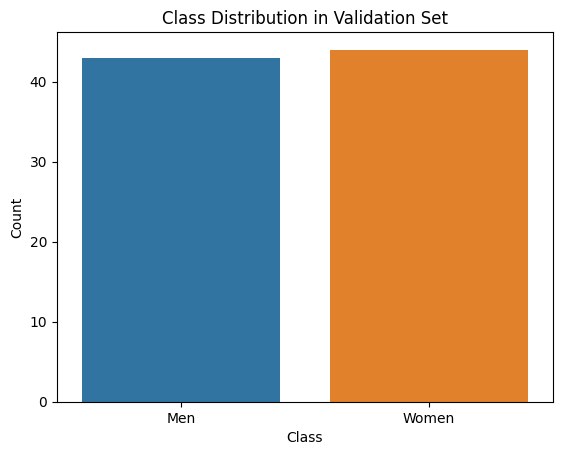

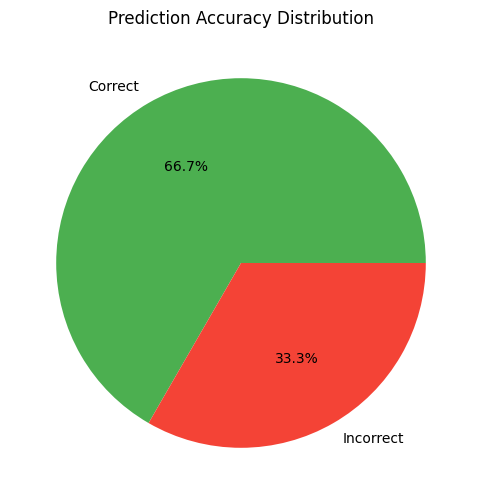

In [1]:
# === IMPORTS ===
import os
import random
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve
import seaborn as sns

# === PARAMETERS ===
base_dir = "/kaggle/input/men-vs-women-images-dataset/data"
img_height, img_width = 150, 150
batch_size = 32

# === DATA LOADERS ===
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

# === MODEL ===
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# === TRAIN ===
history = model.fit(
    train_generator,
    steps_per_epoch=15,
    epochs=5,
    validation_data=val_generator
)

# === RANDOM 9 IMAGE PREDICTIONS ===
labels = {v: k for k, v in train_generator.class_indices.items()}

all_images = []
for category in ['men', 'women']:
    category_path = os.path.join(base_dir, category)
    files = os.listdir(category_path)
    selected = random.sample(files, 5)
    all_images += [os.path.join(category_path, f) for f in selected]

random.shuffle(all_images)
selected_images = all_images[:9]

plt.figure(figsize=(15, 10))
for idx, img_path in enumerate(selected_images):
    img = load_img(img_path, target_size=(img_height, img_width))
    img_array = img_to_array(img) / 255.0
    prediction = model.predict(np.expand_dims(img_array, axis=0))[0][0]
    label = "Man" if prediction < 0.5 else "Woman"

    plt.subplot(3, 3, idx + 1)
    plt.imshow(img)
    plt.title(f"Predicted: {label}", fontsize=12)
    plt.axis('off')
plt.tight_layout()
plt.show()

# === METRICS ===
val_generator.reset()
y_pred_probs = model.predict(val_generator)
y_pred = (y_pred_probs > 0.5).astype(int).reshape(-1)
y_true = val_generator.classes

# === CLASSIFICATION REPORT & CONFUSION MATRIX ===
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=['Men', 'Women']))

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Men', 'Women'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# === ACCURACY & LOSS PLOT ===
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.legend()
plt.title("Accuracy Over Epochs")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.legend()
plt.title("Loss Over Epochs")
plt.tight_layout()
plt.show()

# === ROC CURVE ===
fpr, tpr, _ = roc_curve(y_true, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# === PRECISION-RECALL CURVE ===
precision, recall, _ = precision_recall_curve(y_true, y_pred_probs)
plt.figure()
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

# === CLASS DISTRIBUTION ===
sns.countplot(x=y_true)
plt.xticks([0, 1], ['Men', 'Women'])
plt.title("Class Distribution in Validation Set")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# === PREDICTION ACCURACY PIE CHART ===
correct = np.sum(y_pred == y_true)
incorrect = np.sum(y_pred != y_true)

plt.figure(figsize=(6, 6))
plt.pie([correct, incorrect], labels=['Correct', 'Incorrect'], autopct='%1.1f%%', colors=['#4CAF50', '#F44336'])
plt.title("Prediction Accuracy Distribution")
plt.show()
